In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

import sys
sys.path.append("../../")

# Package for importing image representation
from PIL import Image, ImageOps

# from src.V1_reconst import generate_Y, reconstruct
import pandas as pd
import seaborn as sns
import time
import os.path
from src.compress_sensing_library import *
from src.utility_library import *
from src.figure_library import *

# Setup

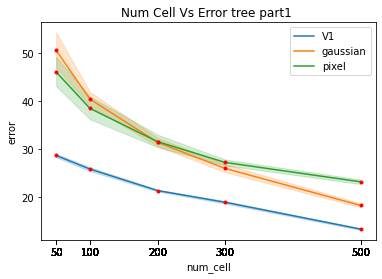

In [4]:
img = 'tree_part1.jpg'
img_nm = img.split('.')[0]
root = search_root()
method = 'dwt'
V1_file = 'param_db2_Mon_Apr_24_13_52_32_2023.csv'
pixel_file = 'param_db2_Mon_Apr_24_12_36_36_2023.csv'
gau_file = 'param_db2_Mon_Apr_24_12_37_23_2023.csv'

# data = process_result_data(img, 'dwt', pixel_file, gau_file, V1_file)
num_cell_error_figure(img, method, pixel_file, gau_file, V1_file, save = False)
# load_V1 = '{root}/result/dwt/{img}/V1/param_db2_Mon_Apr_24_13_52_32_2023.csv'.format(root = root, img = img_nm)
# load_pixel = '{root}/result/dct/{img}/pixel/param_db2_Mon_Apr_24_12_36_36_2023.csv'.format(root = root, img = img_nm)
# load_gaussian = '{root}/result/dct/{img}/gaussian/param_db2_Mon_Apr_24_12_37_23_2023.csv'.format(root = root, img = img_nm)
# directory = "num_cell_error"

# save = True
# data = [load_pixel, load_gaussian, load_V1]


In [12]:
V1_df = pd.read_csv(load_V1)
V1_df

,Unnamed: 0,rep,lv,alp,num_cell,cell_size,sparse_freq,error
0,0,0,1,0.001,50,1,1,3042.375229
1,1,0,1,0.001,50,1,2,6580.876056
2,2,0,1,0.001,50,1,4,6841.155266
3,3,0,1,0.001,50,1,6,7157.648009
4,4,0,1,0.001,50,1,8,7538.594242
...,...,...,...,...,...,...,...,...
52495,52495,19,4,1000.000,500,8,1,74.031642
52496,52496,19,4,1000.000,500,8,2,35.942402
52497,52497,19,4,1000.000,500,8,4,30.552968
52498,52498,19,4,1000.000,500,8,6,30.345783


In [14]:
V1_df = remove_unnamed_data(V1_df)
V1_df

,rep,lv,alp,num_cell,cell_size,sparse_freq,error
0,0,1,0.001,50,1,1,3042.375229
1,0,1,0.001,50,1,2,6580.876056
2,0,1,0.001,50,1,4,6841.155266
3,0,1,0.001,50,1,6,7157.648009
4,0,1,0.001,50,1,8,7538.594242
...,...,...,...,...,...,...,...
52495,19,4,1000.000,500,8,1,74.031642
52496,19,4,1000.000,500,8,2,35.942402
52497,19,4,1000.000,500,8,4,30.552968
52498,19,4,1000.000,500,8,6,30.345783


In [16]:
V1_mean_df = V1_df.groupby(['num_cell', 'sparse_freq', 'cell_size', 'alp', 'lv'], as_index=False).mean().drop('rep', axis=1) 
V1_mean_df

,num_cell,sparse_freq,cell_size,alp,lv,error
0,50,1,1,0.001,1,3576.813059
1,50,1,1,0.001,2,1288.080522
2,50,1,1,0.001,4,121.045027
3,50,1,1,0.010,1,2723.450486
4,50,1,1,0.010,2,1126.810487
...,...,...,...,...,...,...
2620,500,8,8,100.000,2,67.829454
2621,500,8,8,100.000,4,29.901054
2622,500,8,8,1000.000,1,262.433756
2623,500,8,8,1000.000,2,178.322292


In [21]:
V1_min_df = V1_mean_df.sort_values('error').drop_duplicates('num_cell')
V1_min_df = V1_min_df.rename(columns={'error' : 'min_error'})
merge_df = pd.merge(V1_df)

,num_cell,sparse_freq,cell_size,alp,lv,min_error
2192,500,1,8,0.1,4,13.320367
1730,300,2,4,0.1,4,18.907626
1229,200,2,6,1.0,4,21.348293
728,100,2,8,10.0,4,25.827914
413,50,6,8,10.0,4,28.666624


In [24]:
V1_min_mean_err_df = pd.DataFrame()
V1_min_mean_err_df

""


In [27]:
V1_mean_df['num_cell'].unique()

array([500, 300, 200, 100,  50])

In [32]:
for i in V1_mean_df['num_cell'].unique():
        V1_temp = V1_mean_df.loc[V1_mean_df['num_cell'] == i]
        #hyperparameter for each number of cell
        ## Grabbing values by each values
        V1_min_mean_err_df = V1_min_mean_err_df.append(V1_temp.loc[V1_temp['error'] == V1_temp['error'].min()])

# load_V1 = '{root}/result/dwt/{img}/V1/param_db2_Mon_Apr_24_13_52_32_2023.csv'.format(root = root, img = img_nm)
# load_pixel = '{root}/result/dct/{img}/pixel/param_db2_Mon_Apr_24_12_36_36_2023.csv'.format(root = root, img = img_nm)
# load_gaussian = '

In [33]:
V1_min_mean_err_df

,num_cell,sparse_freq,cell_size,alp,lv,error
2192,500,1,8,0.1,4,13.320367
1730,300,2,4,0.1,4,18.907626
1229,200,2,6,1.0,4,21.348293
728,100,2,8,10.0,4,25.827914
413,50,6,8,10.0,4,28.666624


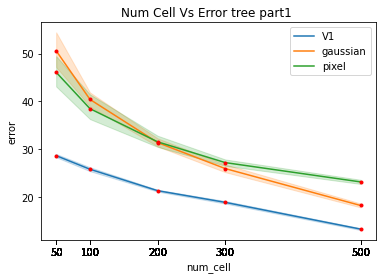

In [4]:
data = process_result_data(img, method, pixel_file, gau_file, V1_file)
plt.xticks(data['V1'][0]['num_cell'])
plt.xlabel('num_cell')
title = "Num_Cell_Vs_Error_{img}_".format(img = img_nm)
plt.title(title.replace('_', ' '))


for obs, plot in data.items():
    sns.lineplot(data = plot[0], x = 'num_cell', y = 'error', palette='Accent', label = obs)
    plt.plot(plot[1]['num_cell'], plot[1]['min_error'], 'r.')
plt.legend(loc = 'best')
plt.savefig("temp", dpi = 200)
plt.show()


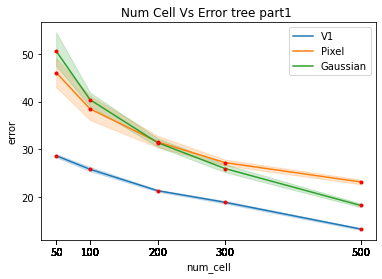

In [9]:

sns.lineplot(data = data['V1'][0], x = 'num_cell', y = 'error', palette='Accent', legend = False)
sns.lineplot(data = data['pixel'][0], x = 'num_cell', y = 'error', palette='Accent', legend = False)
sns.lineplot(data = data['gaussian'][0], x = 'num_cell', y = 'error', palette='Accent', legend = False)
# plt.yscale('log')
plt.xticks(data['V1'][0]['num_cell'])
plt.plot(data['V1'][1]['num_cell'], data['V1'][1]['mean_err'], 'r.') # for V1 numcell location
plt.plot(data['pixel'][1]['num_cell'].unique(), data['pixel'][1]['mean_err'], 'r.') #For pixel samp location
plt.plot(data['gaussian'][1]['num_cell'].unique(), data['gaussian'][1]['mean_err'], 'r.')
plt.xlabel('num_cell')
title = "Num_Cell_Vs_Error_{img}_".format(img = img_nm)
plt.title(title.replace('_', ' '))
plt.legend(['V1', 'Pixel', 'Gaussian'], loc = 'best')
plt.show()

# fig_path = fig_save_path('tree_part1', 'dwt', 'combined', 'NumCell_Error_' + "_".join(
#     str.split(time.ctime().replace(":", "_"))))
# plt.savefig(fig_path, dpi = 200)

## Process V1 data

In [10]:
V1_param_df = pd.read_csv(load_V1)

for index in V1_param_df.columns:
    if (index == 'Unnamed: 0') :
        V1_param_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [11]:
V1_param_mean_df = V1_param_df.groupby(
    ['num_cell', 'sparse_freq', 'cell_size', 'alp'], as_index=False).mean().drop('rep', axis=1) 

V1_param_min_df = V1_param_mean_df.sort_values('error').drop_duplicates('num_cell')
V1_param_min_df = V1_param_min_df.rename(columns={'error': 'min_error'})
V1_merged_df = pd.merge(V1_param_df, V1_param_min_df, 
                               on=['num_cell', 'sparse_freq', 'cell_size', 'alp'], how='left')
V1_plotting_data = V1_merged_df.loc[V1_merged_df['min_error'].notnull()]

In [39]:
#V1 Data processing
V1_min_mean_err_df = pd.DataFrame()
for i in V1_param_mean_df['num_cell'].unique():
    V1_temp = V1_param_mean_df.loc[V1_param_mean_df['num_cell'] == i]
    #hyperparameter for each number of cell
    ## Grabbing values by each values
    V1_min_mean_err_df = V1_min_mean_err_df.append(V1_temp.loc[V1_temp['error'] == V1_temp['error'].min()])
    
# Merge two data to extract
V1_min_mean_err_df = V1_min_mean_err_df.rename(columns={'error' : 'mean_err'})
V1_merged_df = pd.merge(V1_param_df, V1_min_mean_err_df, on = ['num_cell', 'sparse_freq', 'cell_size', 'alp'], how = 'left')
V1_plotting_data = V1_merged_df.loc[V1_merged_df['mean_err'].notnull()]


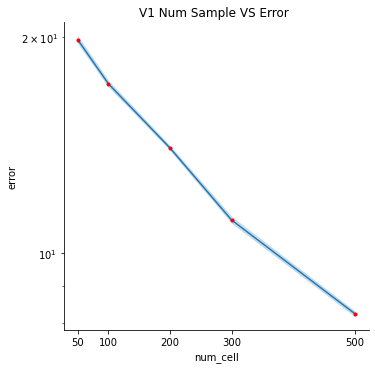

In [40]:
V1_fig = sns.relplot(data = V1_plotting_data, x = 'num_cell', y = 'error', kind= 'line')
V1_fig.set(yscale='log')
plt.plot(V1_param_min_df['num_cell'].unique(), V1_param_min_df['min_error'], 'r.')
title = 'V1_Num_Sample_VS_Error_'
plt.title(title.replace('_', ' '))
plt.xticks(V1_param_df['num_cell'].unique())


# Saving
if (save):
    fig_path = fig_save_path(img_nm, 'dct', '{directory}/V1'.format(directory = directory), title + "_".join(
        str.split(time.ctime().replace(":", "_"))))
    plt.savefig(fig_path, dpi = 200)

plt.show()

## Process pixel Data

In [19]:
pixel_param_df = pd.read_csv(load_pixel)
for index in pixel_param_df.columns:
    if (index == 'Unnamed: 0') :
        pixel_param_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [20]:
pixel_param_mean_df = pixel_param_df.groupby(
    ['alp', 'num_cell'], as_index=False).mean().drop('rep', axis=1) 

pixel_param_min_df = pixel_param_mean_df.sort_values('error').drop_duplicates('num_cell')
pixel_param_min_df = pixel_param_min_df.rename(columns={'error': 'min_error'})
pixel_merged_df = pd.merge(pixel_param_df, pixel_param_min_df, 
                               on=['alp', 'num_cell'], how='left')
pixel_plotting_data = pixel_merged_df.loc[pixel_merged_df['min_error'].notnull()]

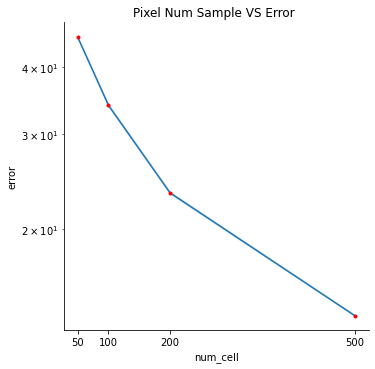

'/home/bans/Documents/research/figures/dct/peppers/num_cell_error/pixel/Pixel_Num_Sample_VS_Error_Mon_May_15_12_33_00_2023.png'

In [26]:
pixel_fig = sns.relplot(data = pixel_plotting_data, x = 'num_cell', y = 'error', kind= 'line')
pixel_fig.set(yscale='log')
plt.plot(pixel_param_min_df['num_cell'].unique(), pixel_param_min_df['min_error'], 'r.')
title = 'Pixel_Num_Sample_VS_Error_'
plt.title(title.replace('_', ' '))
plt.xticks(pixel_param_df['num_cell'].unique())

if (save):
    fig_path = fig_save_path(img_nm, 'dct', '{directory}/pixel'.format(directory = directory), title + "_".join(
        str.split(time.ctime().replace(":", "_"))))
    pixel_fig.savefig(fig_path, dpi = 200)
    
plt.show()
fig_path

## Load gaussian

In [27]:
gaussian_param_df = pd.read_csv(load_gaussian)
for index in gaussian_param_df.columns:
    if (index == 'Unnamed: 0') :
        gaussian_param_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [28]:
gaussian_param_mean_df = gaussian_param_df.groupby(
    ['alp', 'num_cell'], as_index=False).mean().drop('rep', axis=1) 

gaussian_param_min_df = gaussian_param_mean_df.sort_values('error').drop_duplicates('num_cell')
gaussian_param_min_df = gaussian_param_min_df.rename(columns={'error': 'min_error'})
gaussian_merged_df = pd.merge(gaussian_param_df, gaussian_param_min_df, 
                               on=['alp', 'num_cell'], how='left')
gaussian_plotting_data = gaussian_merged_df.loc[gaussian_merged_df['min_error'].notnull()]

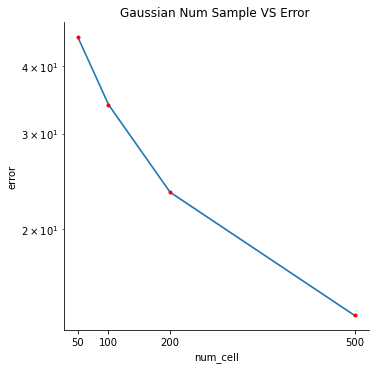

In [29]:
gaussian_fig = sns.relplot(data = gaussian_plotting_data, x = 'num_cell', y = 'error', kind= 'line')
gaussian_fig.set(yscale='log')
plt.plot(gaussian_param_min_df['num_cell'].unique(), gaussian_param_min_df['min_error'], 'r.')
title = 'Gaussian_Num_Sample_VS_Error_'
plt.title(title.replace('_', ' '))
plt.xticks(gaussian_param_df['num_cell'].unique())

if (save):
    fig_path = fig_save_path(img_nm, 'dct', '{directory}/gaussian'.format(directory = directory), title + "_".join(
        str.split(time.ctime().replace(":", "_"))))
    plt.savefig(fig_path, dpi = 200)

plt.show()

# for saving


## V1 Vs Pixel Vs Gaussian

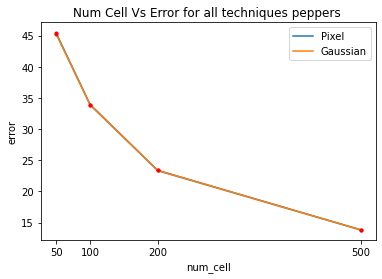

In [34]:
# V1_err = sns.lineplot(data = V1_plotting_data, x = 'num_cell', y = 'error', palette='Accent', legend = False)
pixel_err = sns.lineplot(data = pixel_plotting_data, x = 'num_cell', y = 'error')
gaussian_err = sns.lineplot(data = gaussian_plotting_data, x = 'num_cell', y = 'error')
# plt.yscale('log')
# plt.xticks(V1_param_min_df['num_cell'])
plt.xticks(pixel_param_min_df['num_cell'])
# plt.plot(V1_param_min_df['num_cell'], V1_param_min_df['min_error'], 'r.') # for V1 numcell location
plt.plot(pixel_param_min_df['num_cell'].unique(), pixel_param_min_df['min_error'], 'r.') #For pixel samp location
plt.plot(gaussian_param_min_df['num_cell'].unique(), gaussian_param_min_df['min_error'], 'r.')
plt.xlabel('num_cell')
title = "Num_Cell_Vs_Error_for_all_techniques_{img}_".format(img = img_nm)
plt.title(title.replace('_', ' '))
plt.legend(['Pixel', 'Gaussian'], loc = 'best')


if (save):
    fig_path = fig_save_path(img_nm, 'dct', '{directory}/combined'.format(directory = directory), 
                             'NumCell_Error_' + "_".join(str.split(time.ctime().replace(":", "_"))))
    plt.savefig(fig_path, dpi = 200)
plt.show()

In [15]:
s = 'hello'
if s[-1] != '_':
    s = s + '_'
s + "_".join(str.split(time.ctime().replace(":", "_")))

'hello_Wed_Aug_2_15_55_06_2023'

In [12]:
gau_file.split('.')[0] + '_' + pixel_file.split('.')[0] + '_' + V1_file.split('.')[0]

'param_db2_Mon_Apr_24_12_37_23_2023_param_db2_Mon_Apr_24_12_36_36_2023_param_db2_Mon_Apr_24_13_52_32_2023'

In [3]:
plotting_dict ={}

for load_data in data:
    if (load_data != "-n"):
        param_df = pd.read_csv(load_data)
        for index in param_df.columns:
            if (index == 'Unnamed: 0') :
                param_df.drop('Unnamed: 0', axis = 1, inplace=True)
        if (load_data.split("_")[1].lower() != 'v1'):
            param_mean_df = param_df.groupby(
                ['alp', 'num_cell'], as_index=False).mean().drop('rep', axis=1) 

            param_min_df = param_mean_df.sort_values('error').drop_duplicates('num_cell')
            param_min_df = param_min_df.rename(columns={'error': 'min_error'})
            merged_df = pd.merge(param_df, param_min_df, 
                                           on=['alp', 'num_cell'], how='left')
            plotting_data = merged_df.loc[merged_df['min_error'].notnull()]
            
            